#### 简单线性回归

简单线性回归(单变量univariate)的目标是建立单个特征(explanatory variable, $x$)与联系值目标(response variable, $y$)之间的线性关系。具有一个解释变量的线性模型方程定义如下：

$$y = w_{1}x+ b$$

其中，$w_{1}$ 是权重(weight)，$b$ 是偏置单元(bias unit)。前者为解释变量的权重，后者为y轴截距(intercept)。因此，线性回归可以理解为通过训练样本寻找最佳拟合直线，如下图：



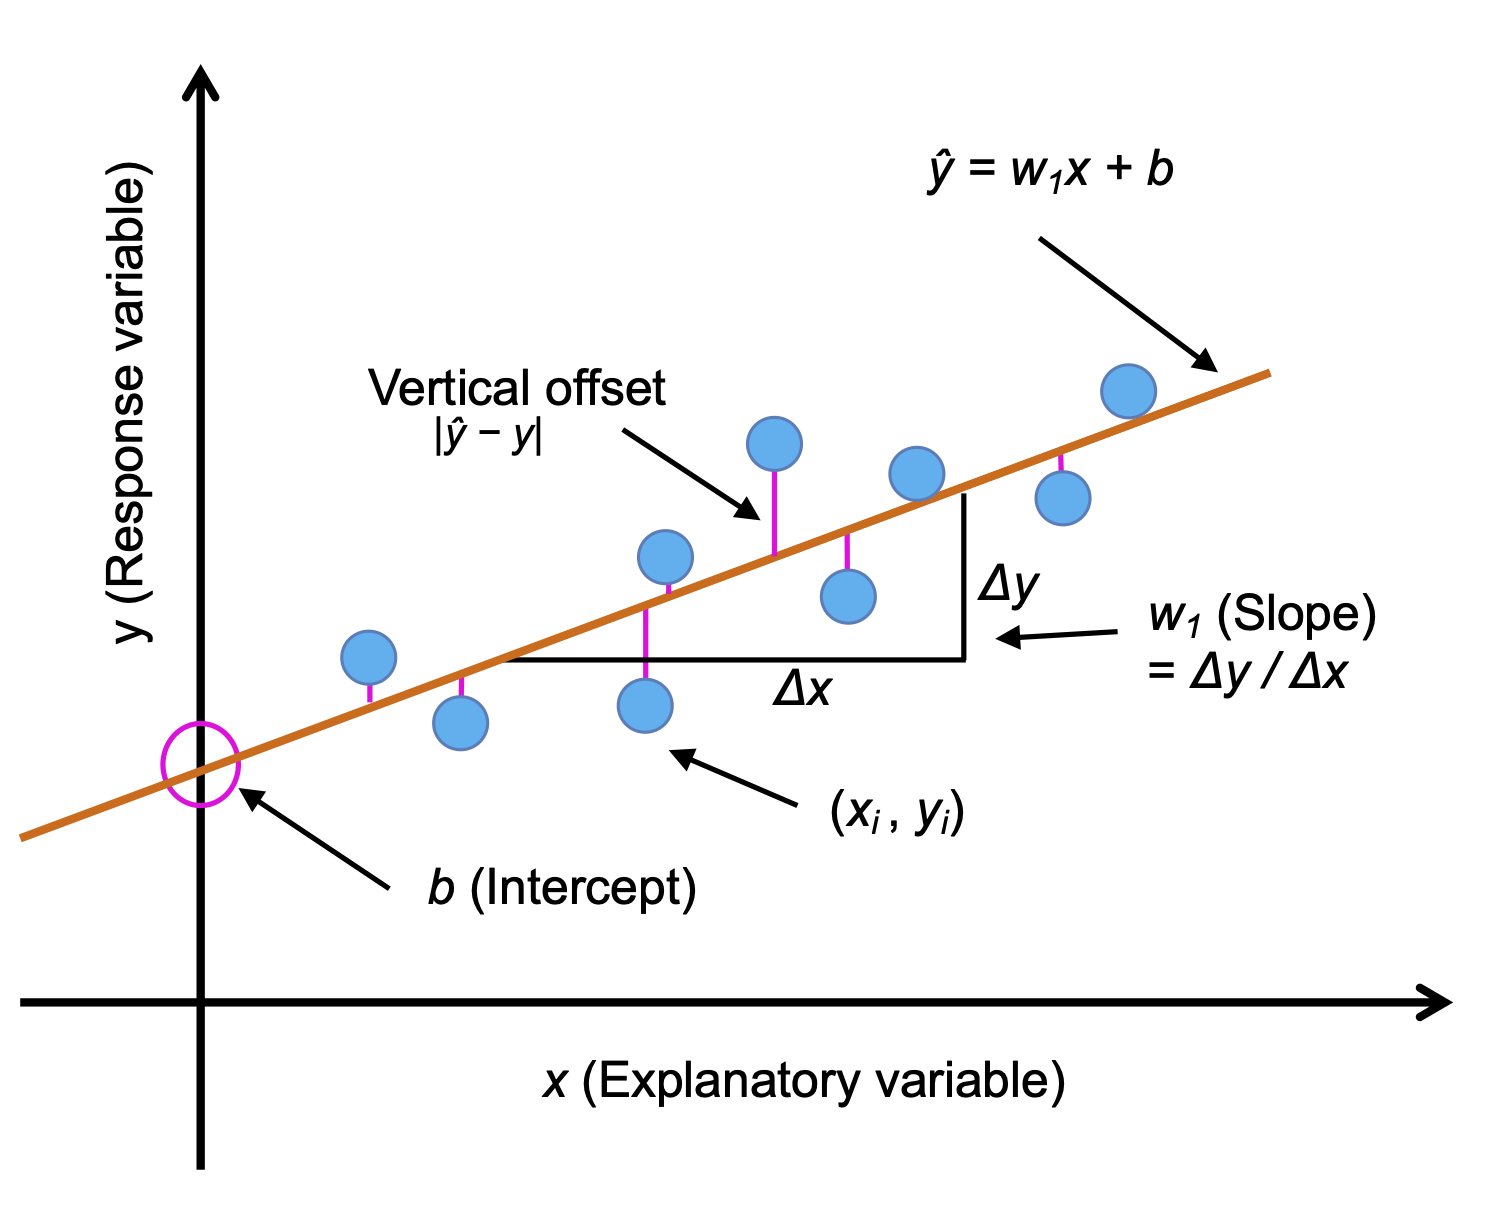

In [1]:
from IPython.display import Image

Image(filename='../Python-MachineLearning/Attached_images/Chapter9/figures/09_01.png', 
      width=450)

在上图中，最佳拟合直线也被称为回归线(regression line)， 从回归线到训练样本的垂直线是所谓的偏移量(offsets)或者残差(residuals), 即我们预测结果的误差。

#### 多元线性回归

将单变量推广到多变量的情况，可以得到如下公式：

$$y = w_1x_1 + ... + w_mx_m + b = \sum_{i=1}^mw_ix_i + b = w^T\boldsymbol{x} + b$$

下图展示了具有两个特征的多元线性回归模型具有的二维拟合超平面(fitted hyperplane):

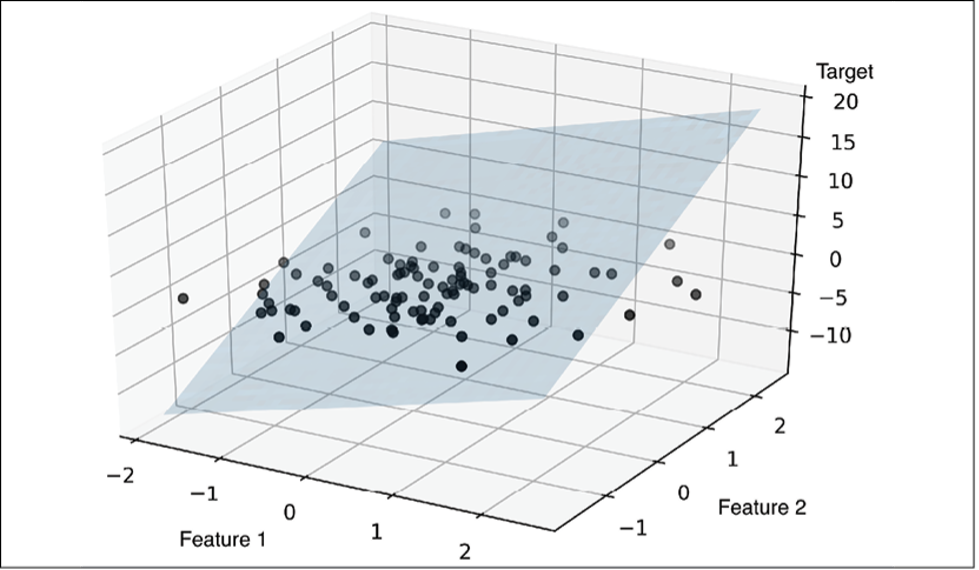

In [2]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter9/figures/09_01_2.png', 
      width=450)

#### 探索Ames Housing dataset

- `'Overall Qual'`: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- `'Overall Cond'`: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
- `'Gr Liv Area'`: Above grade (ground) living area square feet
- `'Central Air'`: Central air conditioning

       N	No
       Y	Yes

- `'Total Bsmt SF'`: Total square feet of basement area
- `'SalePrice'`: Sale price $$

In [3]:
# 数据链接.   https://jse.amstat.org/v19n3/decock/AmesHousing.txt
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [4]:
# df.to_csv('../Python-MachineLearning/Datasets/Ames_house/house.csv', index=None)

In [5]:
df.shape

(2930, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 137.5+ KB


In [7]:
# 从上面df.info()结果中可以看出，Central Air    2930 non-null   object ， 因此要转换为数值型.
df['Central Air'] = df['Central Air'].map({'N':0, 'Y':1})

In [8]:
# 缺失值统计.
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [9]:
# 移除缺失值.
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

##### 可视化重要的特征

In [10]:
# %pip install -i https://mirrors.ustc.edu.cn/simple mlxtend

Looking in indexes: https://mirrors.ustc.edu.cn/simpleNote: you may need to restart the kernel to use updated packages.



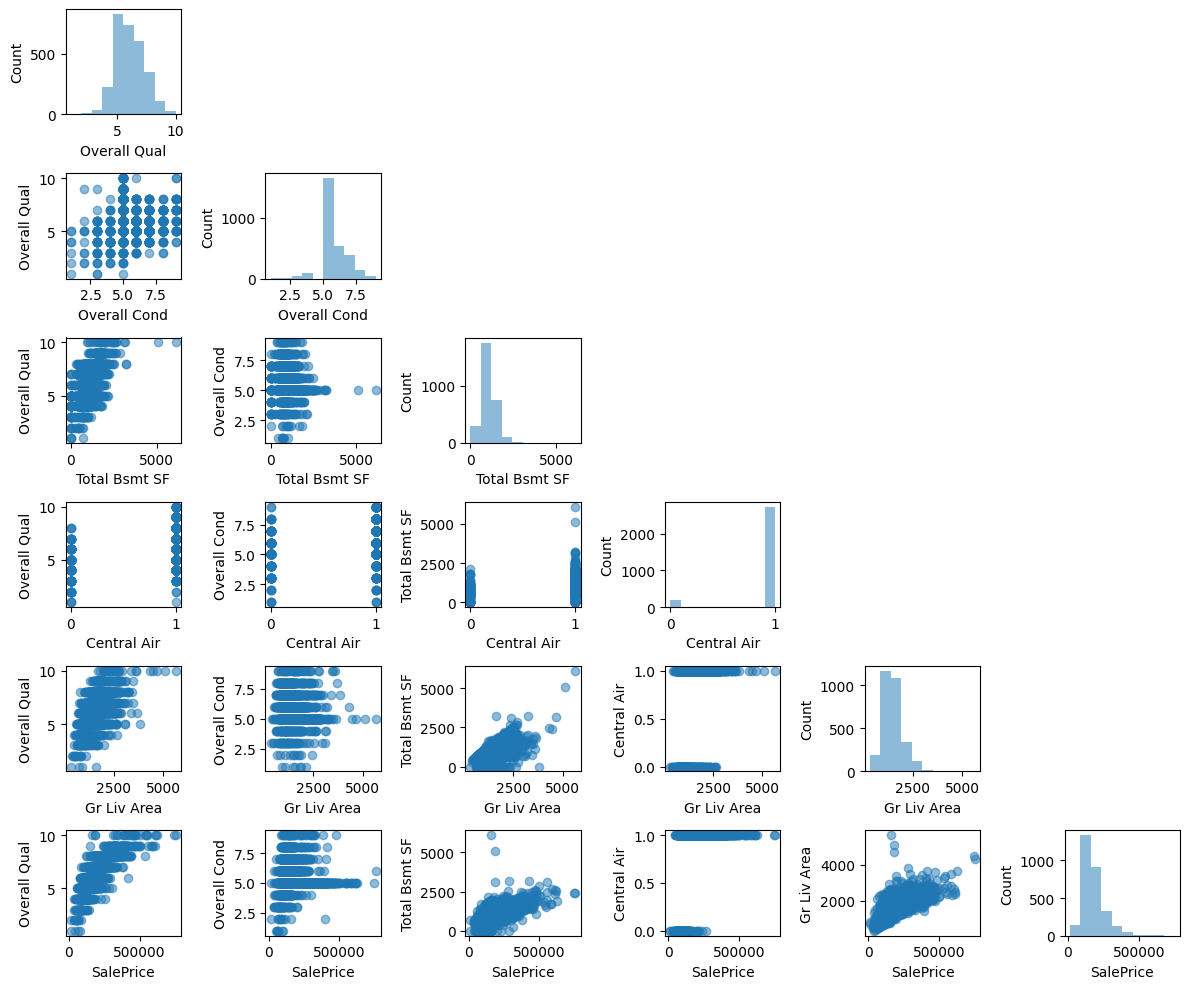

In [12]:
# Exploratory data analysis(EDA). 创建一个散点图矩阵.
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

##### 相关性分析

可以将相关性矩阵(correlation matrix)解释为协方差矩阵(covariance matrix)的重缩放版本.`事实上，特征标准化处理之后，相关性矩阵与协方差矩阵相同`.

相关性矩阵是一个方阵，包含皮尔孙积矩相关系数(Pearson product-moment corralation coefficient)(通常缩写为Pearson's r), 用于度量特征对之间的线性相关性。 其中，相关系数的取值范围是$[-1, 1]$。 如果，两个特征完全正相关，则$r=1$, $r=0$则不线性相关，$r=-1$,则完全负相关. 皮尔森相关系数计算过程为： 两个特征$x, y$之间的协方差除以其标准差，如下：

$$r=\frac{\sum_{i=1}^{n}\bigl[(x^{(i)}-\mu_{x})\bigl(y^{(i)}-\mu_{y}\bigr)\bigr]}{\sqrt{\sum_{i=1}^{n}(x^{(i)}-\mu_{x})^{2}} \sqrt{\sum_{i=1}^{n}\bigl(y^{(i)}-\mu_{y}\bigr)^{2}}}=\frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

其中，$\mu$为相应特征的均值，$\sigma_{xy}$为特征$x, y$之间的协方差， $\sigma_{x}$和$\sigma_{y}$是特征的标准差.

##### 标准化特征的协方差与相关性

对特征$x, y$, 记对应标准化之后的特征分别为$x', y'$， 如下：

$$x'=\frac{x-\mu_{x}}{\sigma_{x}}, y'=\frac{y-\mu_{y}}{\sigma_{y}}$$

计算特征对的协方差矩阵：

$$\sigma_{xy}=\frac{1}{n}\sum_{i}^{n}\bigl(x^{(i)}-\mu_{x}\bigr)\bigl(y^{(i)}-\mu_{y}\bigr)$$

由于该特征进行了标准化处理，因此均值$\mu$为0，于是有：

$$\sigma'_{xy}=\frac{1}{n}\sum_{i}^{n}\bigl(x'^{(i)}-0\bigr)\bigl(y'^{(i)}-0\bigr)$$

所以通过重新代入(resubstitution), 得到如下形式：

$$\begin{aligned}
&\sigma^{\prime}_{xy} =\frac{1}{n}\sum_{i}^{n}\left(\frac{x-\mu_{x}}{\sigma_{x}}\right)\left(\frac{y-\mu_{y}}{\sigma_{y}}\right) \\
&\sigma^{\prime}_{xy} =\frac{1}{n\cdot\sigma_{x}\sigma_{y}}\sum_{i}^{n}\bigl(x^{(i)}-\mu_{x}\bigr)\bigl(y^{(i)}-\mu_{y}\bigr) 
\end{aligned}$$

所以，可以看到，标准化后的特征(standardized features),其皮尔森相关系数等于协方差：

$$\sigma^{\prime}{}_{xy}=\frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

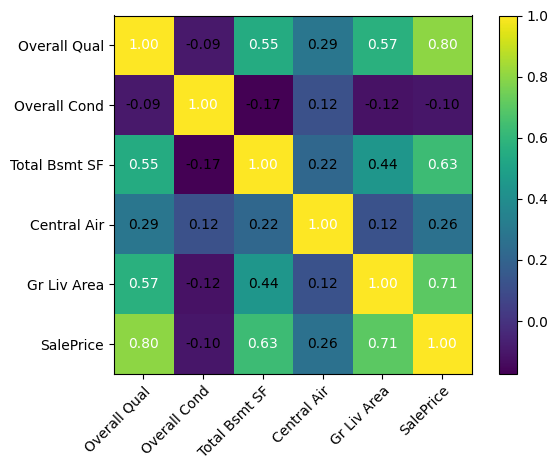

In [15]:
# 创建相关性矩阵来对特征之间的关系进行量化.
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

#### 实现最小二乘线性回归模型(ordinary least squares linear regression model)

在前面提到的最佳拟合直线，但怎样去衡量"最佳"？

所以，这里将采用ordinary least squares(OLS)--最小二乘法(有时候也称为线性最小二乘)来估计线性回归线的参数，即通过最小化训练样本与回归线的垂直距离(残差或误差)的平方和.

##### 使用梯度下降来求解回归参数